## Calculation of Area Covered by Image

This script, extracted from my Master's Thesis pipeline, contains pixel distance data between lasers in 50 images. Using these 50 images, we can train a linear regression model to compare the measured image areas with the height at which the ROV (Remotely Operated Vehicle) was located at that specific moment. Subsequently, we can make predictions based on this model. By knowing the ROV's height through telemetry, we can estimate the area covered by the image.

Despite the results not being entirely satisfactory, as the regression line does not always perfectly fit reality and sometimes the height at which the ROV is located is not correctly synchronized with the image, this initial approach represents an important step in addressing the problem of area calculation.

In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


    SUB1_Altitude  Pixel-cm
0            0.84   46.4332
1            0.95   43.1545
2            0.96   44.5856
3            0.99   35.7016
4            0.99   56.7153
5            1.00   42.6127
6            1.01   42.5130
7            1.03   60.3800
8            1.05   63.5690
9            1.06   34.0064
10           1.07   43.6965
11           1.08   28.3655
12           1.08   51.3074
13           1.09   56.2790
14           1.09   44.7290
15           3.49   78.6984
16           3.05   55.9269
17           3.00   36.7408
18           2.91   51.6109
19           2.90   70.4403
20           2.81   52.5582
21           2.76   29.7149
22           2.76   43.2263
23           2.74   42.5661
24           2.69   32.2872
25           2.68   38.7930
26           2.60   33.4695
27           2.60   58.3721
28           1.38   34.3972
29           1.37   33.0714
30           1.37   44.0291
31           1.36   31.8810
32           1.36   35.9489
33           1.36   30.4704
34           1.36   

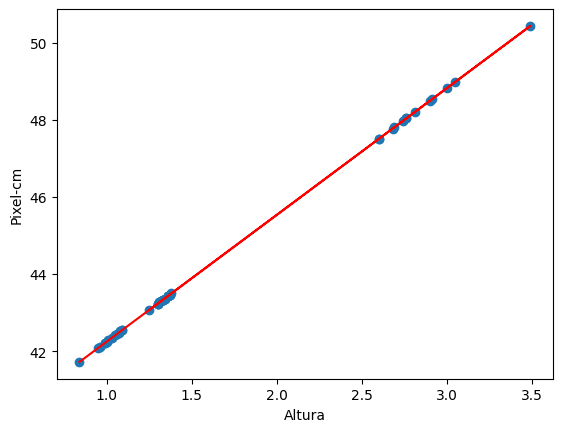

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Cargar los datos del archivo .csv
data = pd.read_csv('Regresion_cap.csv')

# Definir las variables x e y
x = data['Pixel-cm'].values.reshape(-1,1)
y = data['SUB1_Altitude'].values.reshape(-1,1)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(x, y)

# Calcular los residuos estudentizados
y_pred = model.predict(x)
residuals = y - y_pred
studentized_residuals = stats.zscore(residuals)

# Definir el umbral para detectar outliers
threshold = 3

# Filtrar los datos para eliminar outliers
filtered_data = data[abs(studentized_residuals) < threshold]

# Definir las variables x e y con los datos filtrados
x = filtered_data['SUB1_Altitude'].values.reshape(-1,1)
y = filtered_data['Pixel-cm'].values.reshape(-1,1)

# Crear el modelo de regresión lineal con los datos filtrados
model = LinearRegression()
model.fit(x, y)

# Predecir los valores de y para cada valor de x con los datos filtrados
y_pred = model.predict(x)

# Crear x_pred con los valores de x que van junto a y_pred
x_pred = x

# Mostrar la tabla con las alturas y el área predicha
print(filtered_data[['SUB1_Altitude', 'Pixel-cm']])

# Graficar los datos originales y la línea de regresión
plt.scatter(x_pred, y_pred)
plt.plot(x_pred, y_pred, color='red')
plt.ylabel('Pixel-cm')
plt.xlabel('Altura')
plt.show()

In [10]:
# Obtener la pendiente de la regresión
pendiente = model.coef_[0][0]
print("Pendiente de la regresión (m):", pendiente)

Pendiente de la regresión (m): 3.287096441289187
